In [83]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

%matplotlib inline 
warnings.filterwarnings('ignore')

sns.set()

pd.set_option('display.max_columns', 200)

pd.set_option('display.max_rows', 200)

In [84]:
train = pd.read_csv('train.csv', header=0)
test = pd.read_csv('test.csv', header=0)

all_data = pd.concat((
    train.loc[:,'MSSubClass' : 'SaleCondition'],
    test.loc[:,'MSSubClass' : 'SaleCondition']
))

all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [85]:
all_data.shape

(2919, 79)

In [86]:
train[['GrLivArea', 'LotArea', 'SalePrice']].head()

,GrLivArea,LotArea,SalePrice
0,1710,8450,208500
1,1262,9600,181500
2,1786,11250,223500
3,1717,9550,140000
4,2198,14260,250000


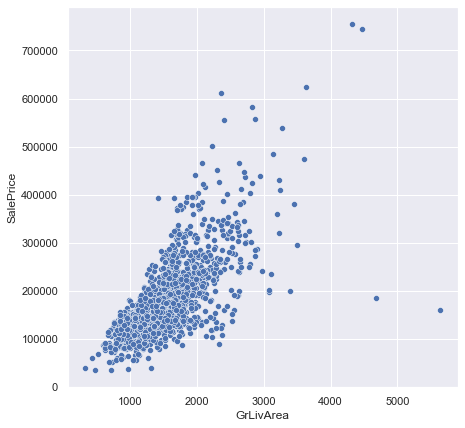

In [87]:
sns.set_style('darkgrid')
plt.figure(figsize=(7,7))
sns.scatterplot(x='GrLivArea', y='SalePrice', data = train)
plt.show()

In [88]:
train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index

Int64Index([523, 1298], dtype='int64')

In [89]:
train = train.drop(train[(train['GrLivArea'] > 4000) & (train['SalePrice'] < 200000)].index).reset_index(drop=True)

In [90]:
all_data = pd.concat((
    train.loc[:,'MSSubClass' : 'SaleCondition'],
    test.loc[:,'MSSubClass' : 'SaleCondition']
))

In [91]:
all_data.shape

(2917, 79)

In [92]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Numerical to Categorical conversion

In [93]:
all_data['MSSubClass'] = all_data['MSSubClass'].apply(str)
all_data['OverallCond'] = all_data['OverallCond'].astype(str)
all_data['MoSold'] = all_data['MoSold'].apply(str)
all_data['YrSold'] = all_data['YrSold'].apply(str)


# Encode all categorical variables

In [94]:
from sklearn.preprocessing import LabelEncoder

cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond','GarageQual', 'GarageCond', 'ExterQual', 'ExterCond', 'Heating', 'HeatingQC', 'PoolQC', 'KitchenQual', 
'BsmtFinType1', 'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope', 'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'OverallCond', 'MSSubClass',  'MoSold', 'YrSold')

for c in cols:
    lbl = LabelEncoder()
    lbl.fit(list(all_data[c].values))
    all_data[c] = lbl.transform(list(all_data[c].values))

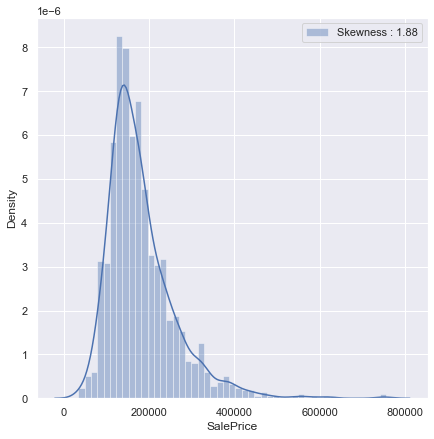

In [95]:
from scipy.stats import skew 
plt.figure(figsize=(7,7))
g = sns.distplot(train['SalePrice'], label = "Skewness : %.2f" %(train["SalePrice"].skew()))
g = g.legend(loc='best')
plt.show()

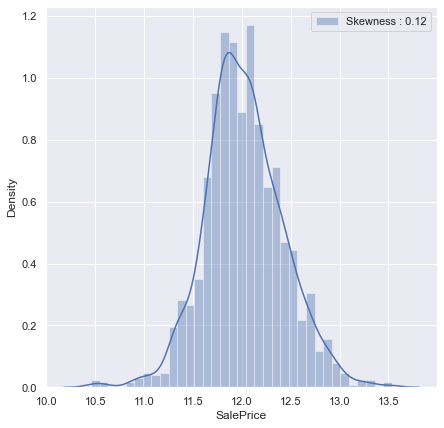

In [96]:
normalizedSalePrice = np.log1p(train['SalePrice'])
plt.figure(figsize=(7,7))
g = sns.distplot(normalizedSalePrice, label = "Skewness : %.2f" %(normalizedSalePrice.skew()))
g = g.legend(loc='best')
plt.show()


In [97]:
train['SalePrice'] = np.log1p(train['SalePrice'])

In [98]:
def get_skewed_features():
    numeric_features = all_data.dtypes[all_data.dtypes != "object"].index
    skewed_features = all_data[numeric_features].apply(lambda x : skew(x.dropna()))
    skewed_features = skewed_features[abs(skewed_features) > 0.75 ]
    return skewed_features.index

In [99]:
from sklearn.preprocessing import power_transform

skewed_features = get_skewed_features()
print(f"{len(skewed_features)} heavily skewed features")



38 heavily skewed features


In [100]:
all_data[skewed_features] = power_transform(all_data[skewed_features], method = 'yeo-johnson')
print('Applied power transform successfully')

Applied power transform successfully


In [101]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,10,RL,-0.115145,-0.137283,0.064271,0.269853,3,Lvl,AllPub,Inside,-0.225372,CollgCr,Norm,Norm,1Fam,2Story,7,4,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.244701,-1.129749,0.387597,PConc,-0.503428,0.105429,0.566988,2,0.805508,0.195569,-0.367519,-0.870411,856.0,-0.086445,0,0.268388,SBrkr,-0.776583,1.184174,-0.117913,0.567853,1.0,-0.252722,2,1,3,-0.166001,-0.726445,8,0.237351,0,0.905393,Attchd,2003.0,1,2.0,548.0,-0.025962,-0.073455,0.324562,-0.948306,0.828436,-0.432128,-0.113346,-0.310168,-0.064271,0.055632,0.492691,NaN,-0.191318,4,2,WD,Normal
1,5,RL,0.532691,0.116745,0.064271,0.269853,3,Lvl,AllPub,FR2,-0.225372,Veenker,Feedr,Norm,1Fam,1Story,6,7,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,-0.809760,0.774646,0.387597,CBlock,-0.503428,0.105429,-1.372206,0,1.019141,0.195569,-0.367519,-0.416994,1262.0,-0.086445,0,0.268388,SBrkr,0.433739,-0.864366,-0.117913,-0.372600,0.0,3.956911,2,0,3,-0.166001,0.915233,6,0.237351,1,-0.066116,Attchd,1976.0,1,2.0,460.0,-0.025962,-0.073455,0.324562,1.217449,-1.079756,-0.432128,-0.113346,-0.310168,-0.064271,0.055632,0.492691,NaN,-0.191318,7,1,WD,Normal
2,10,RL,0.019186,0.438787,0.064271,0.269853,0,Lvl,AllPub,Inside,-0.225372,CollgCr,Norm,Norm,1Fam,2Story,7,4,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.209100,-1.129749,0.387597,PConc,-0.503428,0.105429,-0.611091,2,0.579455,0.195569,-0.367519,-0.031158,920.0,-0.086445,0,0.268388,SBrkr,-0.550703,1.186757,-0.117913,0.702996,1.0,-0.252722,2,1,3,-0.166001,-0.726445,6,0.237351,1,-0.066116,Attchd,2001.0,1,2.0,608.0,-0.025962,-0.073455,0.324562,-0.948306,0.652623,-0.432128,-0.113346,-0.310168,-0.064271,0.055632,0.492691,NaN,-0.191318,11,2,WD,Normal
3,11,RL,-0.345104,0.106261,0.064271,0.269853,0,Lvl,AllPub,Corner,-0.225372,Crawfor,Norm,Norm,1Fam,2Story,7,4,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,-0.809760,0.774646,0.387597,BrkTil,0.819542,-2.542420,0.566988,0,0.150197,0.195569,-0.367519,0.199741,756.0,-0.086445,2,0.268388,SBrkr,-0.414350,1.161397,-0.117913,0.580543,1.0,-0.252722,1,0,3,-0.166001,-0.726445,7,0.237351,1,-1.351399,Detchd,1998.0,2,3.0,642.0,-0.025962,-0.073455,0.324562,-0.948306,0.567733,2.320067,-0.113346,-0.310168,-0.064271,0.055632,0.492691,NaN,-0.191318,4,0,WD,Abnorml
4,10,RL,0.696355,0.933486,0.064271,0.269853,0,Lvl,AllPub,FR2,-0.225372,NoRidge,Norm,Norm,1Fam,2Story,8,4,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,1.343164,-1.129749,0.387597,PConc,-0.503428,0.105429,-1.765393,2,0.758560,0.195569,-0.367519,0.094148,1145.0,-0.086445,0,0.268388,SBrkr,0.131713,1.222455,-0.117913,1.349900,1.0,-0.252722,2,1,4,-0.166001,-0.726445,9,0.237351,1,-0.066116,Attchd,2000.0,1,3.0,836.0,-0.025962,-0.073455,0.324562,1.084496,0.981092,-0.432128,-0.113346,-0.310168,-0.064271,0.055632,0.492691,NaN,-0.191318,3,2,WD,Normal


In [102]:
all_data = pd.get_dummies(all_data)
all_data.shape

(2917, 214)

In [103]:
all_data.isnull().any().any()

True

In [104]:
all_data = all_data.fillna(all_data.mean())
all_data.isnull().any().any()

False

In [105]:
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice

# Apply Linear Regression

In [106]:
from sklearn.model_selection import cross_val_score 

def rmse_cv(model, cv=5):
    rmse = np.sqrt(-cross_val_score(model, X_train, y, scoring="neg_mean_squared_error", cv = cv))
    return rmse



In [107]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
rmse = rmse_cv(lm)

print(f"RMSE for linear regression withoutr normalizer with mean : {rmse.mean()} and std. dev : {rmse.std()}")

RMSE for linear regression withoutr normalizer with mean : 0.12267368148784566 and std. dev : 0.007349463055025972


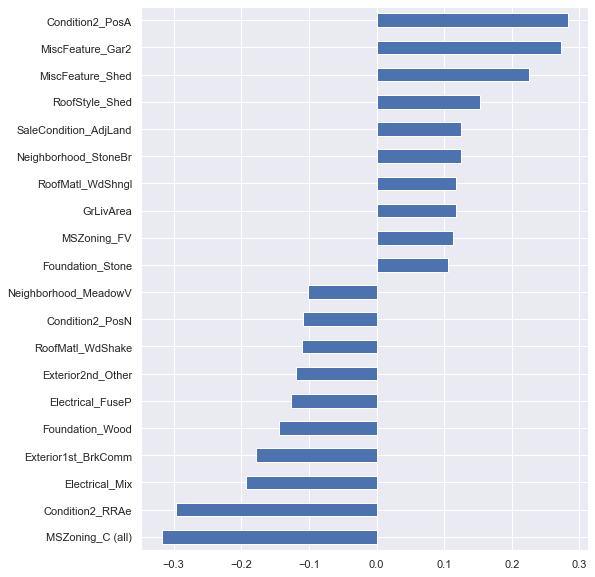

In [108]:
lm.fit(X_train, y)

coef = pd.Series(lm.coef_, index = X_train.columns)
imp_coef = pd.concat([coef.sort_values().head(10), coef.sort_values().tail(10)])

plt.figure(figsize = (8,10))
imp_coef.plot(kind='barh')
plt.show()

# Ridge Regression (L2 Regularization)

In [109]:
from sklearn.linear_model import Ridge 

rm = Ridge(alpha=0.1)
rmse = rmse_cv(rm)
print(f"RMSE for linear regression post applying Ridge regression normalizer with mean : {rmse.mean()} and std. dev : {rmse.std()}")

RMSE for linear regression post applying Ridge regression normalizer with mean : 0.12126673453631247 and std. dev : 0.007600330689810567


[]

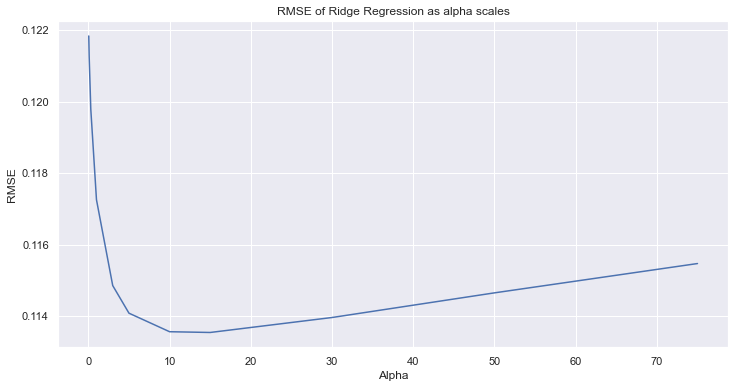

In [110]:
plt.figure(figsize = (12, 6))

alphas = [0.05, 0.1, 0.3, 1,3,5,10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

cv_ridge.plot(title = "RMSE of Ridge Regression as alpha scales")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.plot()



[]

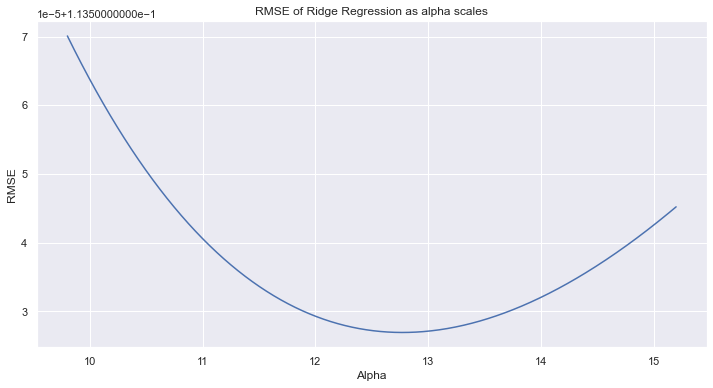

In [111]:
plt.figure(figsize = (12, 6))

alphas = np.linspace(9.8, 15.2, 600)
cv_ridge = [rmse_cv(Ridge(alpha=alpha)).mean() for alpha in alphas]
cv_ridge = pd.Series(cv_ridge, index = alphas)

cv_ridge.plot(title = "RMSE of Ridge Regression as alpha scales")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.plot()



In [112]:
optimal_ridge_alpha = cv_ridge[cv_ridge == cv_ridge.min()].index.values[0]
print(f"Optimal ridge alpha : {optimal_ridge_alpha}")

Optimal ridge alpha : 12.774958263772955


In [113]:
from sklearn.linear_model import Ridge 

rm = Ridge(alpha=12.774958263772955)
rmse = rmse_cv(rm)
print(f"RMSE for linear regression post applying Ridge regression normalizer with mean : {rmse.mean()} and std. dev : {rmse.std()}")

RMSE for linear regression post applying Ridge regression normalizer with mean : 0.1135269487348272 and std. dev : 0.005738659264642528


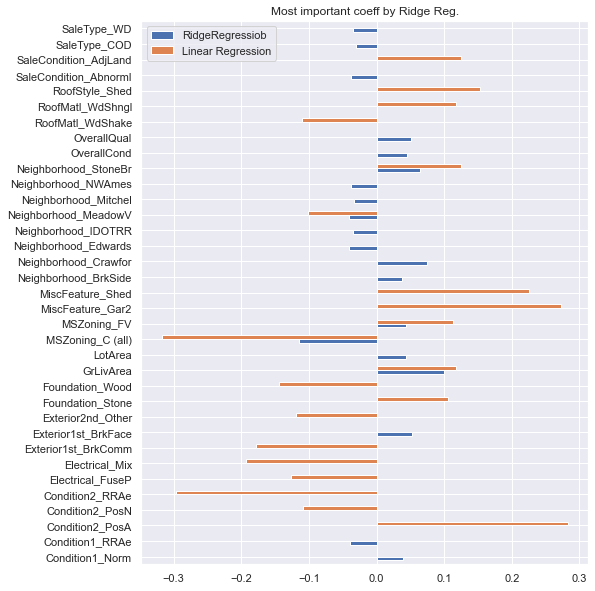

In [114]:
from matplotlib import rcParams


rm.fit(X_train, y)

ridge_coef = pd.Series(rm.coef_, index = X_train.columns)
ridge_imp_coef = pd.concat([ridge_coef.sort_values().head(10), ridge_coef.sort_values().tail(10)])

rcParams['figure.figsize'] = (8.0, 10.0)
df = pd.DataFrame({'RidgeRegressiob' : ridge_imp_coef,
"Linear Regression" : imp_coef})
df.plot(kind='barh')
plt.title("Most important coeff by Ridge Reg.")
plt.show()

# Lasso Regression (L1 regularization)

In [115]:
from sklearn.linear_model import Lasso 

lam = Lasso(alpha=0.1)
rmse = rmse_cv(lam)
print(f"RMSE for linear regression post applying Lasso regression normalizer with mean : {rmse.mean()} and std. dev : {rmse.std()}")

RMSE for linear regression post applying Lasso regression normalizer with mean : 0.20012153270642088 and std. dev : 0.0055044975122077


[]

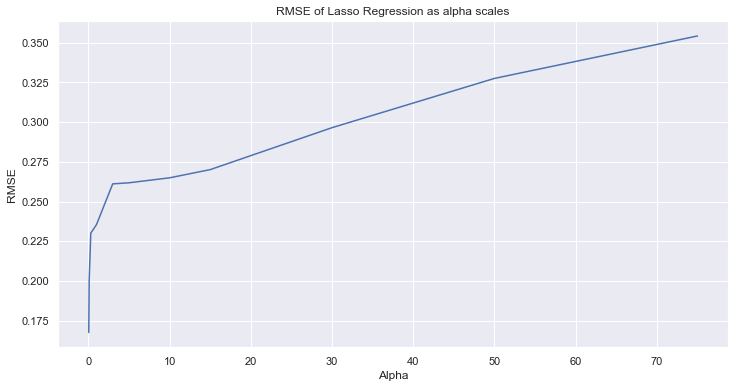

In [116]:
plt.figure(figsize = (12, 6))

alphas = [0.05, 0.1, 0.3, 1,3,5,10, 15, 30, 50, 75]
cv_lasso = [rmse_cv(Lasso(alpha=alpha)).mean() for alpha in alphas]
cv_lasso = pd.Series(cv_lasso, index = alphas)

cv_lasso.plot(title = "RMSE of Lasso Regression as alpha scales")
plt.xlabel("Alpha")
plt.ylabel("RMSE")
plt.plot()



In [117]:
from sklearn.linear_model import LassoCV

lassomodel = LassoCV(alphas = np.linspace(0, 0.0022, 21), cv = 5).fit(X_train, y)
lassomodel.alpha_

optimal_lasso_alpha = lassomodel.alpha_
print(f"Optimal Lasso Alpha = {optimal_lasso_alpha}")


Optimal Lasso Alpha = 0.00044


In [118]:
lassomodel = Lasso(alpha = optimal_lasso_alpha)
rmse = rmse_cv(lassomodel)
print(f"RMSE for linear regression post applying Lasso regression normalizer with mean : {rmse.mean()} and std. dev : {rmse.std()}")

RMSE for linear regression post applying Lasso regression normalizer with mean : 0.11195514667831201 and std. dev : 0.006038466628694183


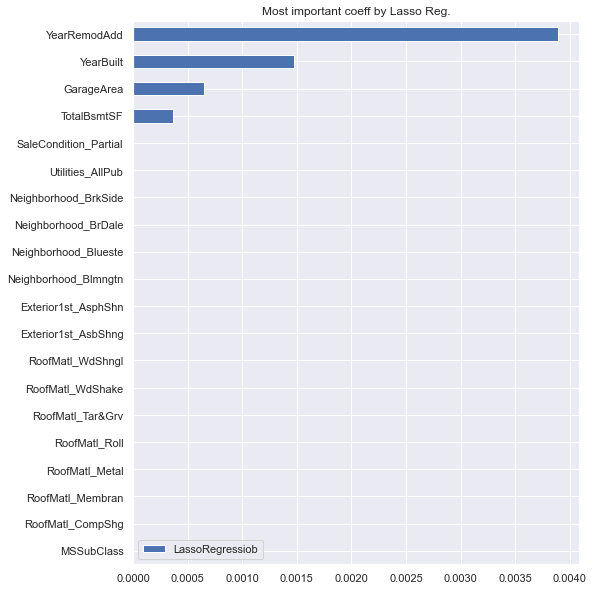

In [126]:
from matplotlib import rcParams


lassomodel.fit(X_train, y)

lasso_coef = pd.Series(lassomodel.coef_, index = X_train.columns)
lasso_imp_coef = pd.concat([lasso_coef.sort_values().head(10), lasso_coef.sort_values().tail(10)])

rcParams['figure.figsize'] = (8.0, 10.0)
df = pd.DataFrame({'LassoRegressiob' : lasso_imp_coef,
"Linear Regression" : imp_coef})
df.plot(kind='barh')
plt.title("Most important coeff by Lasso Reg.")
plt.show()

In [120]:
lasso_coef = pd.Series(lassomodel.coef_, index = X_train.columns)
print(sum(lasso_coef != 0))
print(sum(lasso_coef == 0))

106
108


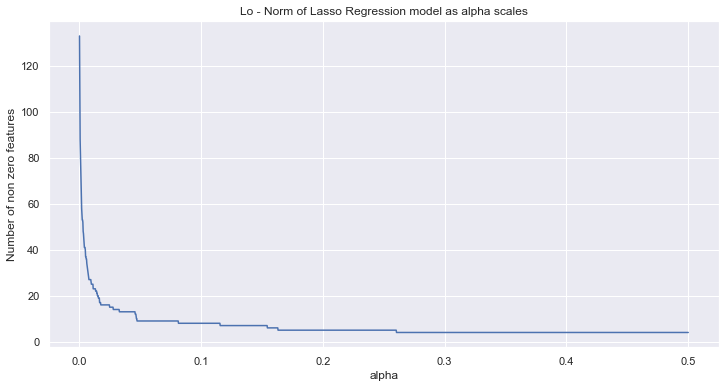

In [121]:
alphas = np.linspace(0.0002, 0.5, 2000)
nonZeros = []

for alpha in alphas:
    lassomodel = Lasso(alpha=alpha).fit(X_train, y)
    coef = pd.Series(lassomodel.coef_, index = X_train.columns)

    nonZeros = np.append(nonZeros, sum(coef != 0))

rcParams['figure.figsize'] = (12.0, 6.0)
lzeroNorm = pd.Series(nonZeros, index=alphas)
lzeroNorm.plot(title = "Lo - Norm of Lasso Regression model as alpha scales")
plt.xlabel("alpha")
plt.ylabel("Number of non zero features")
plt.show()

In [122]:
lzeroNorm.min(), lzeroNorm.max()

(4.0, 133.0)

# Prediction

In [123]:
lm = LinearRegression().fit(X_train, y)
lr_c = pd.DataFrame()
lr_c['Id'] = test['Id']
lr_c['SalePrice'] = np.expm1(lm.predict(X_test))
lr_c.to_csv('lin-reg.csv', index=False)

In [124]:
rm = Ridge(alpha=optimal_ridge_alpha).fit(X_train, y)
rm_c = pd.DataFrame()
rm_c['Id'] = test['Id']
rm_c['SalePrice'] = np.expm1(rm.predict(X_test))
rm_c.to_csv('lin-reg-rm.csv', index=False)

In [125]:
lam = Ridge(alpha=optimal_lasso_alpha).fit(X_train, y)
lam_c = pd.DataFrame()
lam_c['Id'] = test['Id']
lam_c['SalePrice'] = np.expm1(lam.predict(X_test))
lam_c.to_csv('lin-reg-lam.csv', index=False)